##  Validate LDA

In [3]:
# Required libraries.
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import tokenize
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import gensim
import logging
import pickle

In [4]:
# Prepare the text data set 
data=pd.read_csv("/Users/lurui/Desktop/Insight/overall.data.csv")

In [5]:
data=data.drop(['Unnamed: 0'],axis=1)

In [6]:
data.head(10)

,Name,Speciality,Star Rating,Staff,Punctuality,Helpfulness,Knowledge,comment,Rating Usefulness,Review Date,...,compound,polarity,subjectivity,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Positive Sentiment,Negative Sentiment
0,Dr. Natan Schleider,Family Doctor / G.P.,5.0,5,5.0,5,5.0,I thought was extremely caring and attentive...,['0'],"['November', '20,', '2019']",...,0.8883,0.233750,0.818333,0,2.0,0.3777,"staff, care, doctor, patient, office, time, go...","['think', 'extremely', 'care', 'attentive', 'n...",True,False
1,Dr. Natan Schleider,Family Doctor / G.P.,5.0,5,5.0,5,5.0,"was friendly, punctual, and super nice. He e...",['0'],"['July', '7,', '2019']",...,0.8748,0.227083,0.377381,1,2.0,0.3602,"staff, care, doctor, patient, office, time, go...","['friendly', 'punctual', 'super', 'email', 'la...",True,False
2,Dr. Natan Schleider,Family Doctor / G.P.,5.0,5,5.0,5,5.0,My experience with was the opposite of every...,['0'],"['January', '2,', '2019']",...,0.9118,0.000000,0.000000,2,2.0,0.3879,"staff, care, doctor, patient, office, time, go...","['experience', 'doctor', 'past_experiences', '...",True,False
3,Dr. Natan Schleider,Family Doctor / G.P.,5.0,5,5.0,5,5.0,very good. Very knowledgeable and friendly wit...,['0'],"['August', '9,', '2017']",...,0.7506,0.375000,0.500000,3,2.0,0.3933,"staff, care, doctor, patient, office, time, go...","['knowledgeable', 'friendly', 'manner', 'highl...",True,False
4,Dr. Natan Schleider,Family Doctor / G.P.,4.0,5,5.0,5,1.0,is very knowledgeable and friendly with an e...,['0'],"['November', '8,', '2015']",...,0.7506,0.375000,0.500000,4,2.0,0.3933,"staff, care, doctor, patient, office, time, go...","['knowledgeable', 'friendly', 'manner', 'highl...",True,False
5,Dr. Natan Schleider,Family Doctor / G.P.,5.0,5,5.0,5,5.0,Excellent Physician with exceptional bedside m...,['2'],"['August', '13,', '2015']",...,0.7003,0.833333,1.000000,5,2.0,0.3911,"staff, care, doctor, patient, office, time, go...","['excellent', 'physician', 'exceptional', 'bed...",True,False
6,Dr. Natan Schleider,Family Doctor / G.P.,5.0,5,5.0,5,5.0,I've been seeing Dr Schleider for . He is extr...,['5'],"['November', '3,', '2014']",...,0.5520,0.193750,0.675000,6,2.0,0.3678,"staff, care, doctor, patient, office, time, go...","['see', 'schleider', 'extremely', 'thorough', ...",True,False
7,Dr. Natan Schleider,Family Doctor / G.P.,5.0,5,5.0,5,5.0,"Fantastic service, Friendly & Knowledgeable! I...",['1'],"['September', '2,', '2013']",...,0.9349,0.258333,0.633333,7,2.0,0.3980,"staff, care, doctor, patient, office, time, go...","['fantastic', 'service', 'friendly', 'knowledg...",True,False
8,Dr. Natan Schleider,Family Doctor / G.P.,5.0,5,5.0,5,5.0,I am a registered nurse in and worked with ...,['3'],"['July', '10,', '2013']",...,0.7178,-0.300000,0.400000,8,2.0,0.3659,"staff, care, doctor, patient, office, time, go...","['work', 'care', 'patient', 'require', 'hour',...",True,False
9,Dr. Natan Schleider,Family Doctor / G.P.,5.0,5,5.0,5,5.0,"is nice, professional and knowledgable. The ...",['2'],"['April', '7,', '2013']",...,0.7900,0.191667,0.600000,9,2.0,0.3869,"staff, care, doctor, patient, office, time, go...","['place', 'neat', 'really', 'enjoy', 'experien...",True,False


In [7]:
data['trim_comment']

0        I thought   was extremely caring and attentive...
1          was friendly, punctual, and super nice. He e...
2        My experience with   was the opposite of every...
3        very good. Very knowledgeable and friendly wit...
4          is very knowledgeable and friendly with an e...
                               ...                        
12524    He is excellent, kind, and caring. He did a gr...
12525      is the BES doctor in !! he  AND his staff ar...
12526    He is by far the best surgeon in . He did an a...
12527      knows and is very good at his work i've g to...
12528    I love him! He's a great guy and he definitely...
Name: trim_comment, Length: 12529, dtype: object

In [8]:
reviews=data['trim_comment']

In [9]:
review_main_text_list = []
for i in range(0, len(reviews)):
    sentences = tokenize.sent_tokenize(reviews[i])
    for sentence in sentences:
        review_main_text_list.append(sentence)
                
# Set up tokenizer.
tokenizer = RegexpTokenizer(r'\w+')
# Set up stop words.
stop = set(stopwords.words('english'))
# Set up stemmer.
p_stemmer = PorterStemmer()
# Set up logging.
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [10]:
# Store all words.
all_words = []
# Store all sentences.
all_sentences = []
# Store all cleaned up texts.
cleaned_up_review_list = []
# For each review.
for sentence in review_main_text_list:
    # Tokenization
    raw = sentence.lower()
    tokens = tokenizer.tokenize(raw)
    
    # Get stop words
    j = 0
    while j < len(tokens):
        if tokens[j] in stop:
            del tokens[j]
        else:
            j += 1

    cleaned_text = [p_stemmer.stem(i) for i in tokens]
    
    all_sentences.append(cleaned_text)
    for token in cleaned_text:
        all_words.append(token)


In [11]:
### Step 3: Train word2vec and K-means model
model = gensim.models.Word2Vec(all_sentences, size=100, window=100, min_count=5, iter=10, workers=1)

all_words_unique = nltk.FreqDist(all_words).most_common(100)
all_words_unique_vec = []
all_words_unique_word = []
for index2, item2 in enumerate(all_words_unique):
    all_words_unique_vec.append(list(model.wv[item2[0]]))
    all_words_unique_word.append(item2[0])
    

2020-02-02 22:38:47,361 : INFO : collecting all words and their counts
2020-02-02 22:38:47,368 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-02-02 22:38:47,390 : INFO : PROGRESS: at sentence #10000, processed 58472 words, keeping 4235 word types
2020-02-02 22:38:47,406 : INFO : PROGRESS: at sentence #20000, processed 117996 words, keeping 5588 word types
2020-02-02 22:38:47,423 : INFO : PROGRESS: at sentence #30000, processed 175488 words, keeping 6826 word types
2020-02-02 22:38:47,449 : INFO : PROGRESS: at sentence #40000, processed 234855 words, keeping 7918 word types
2020-02-02 22:38:47,466 : INFO : PROGRESS: at sentence #50000, processed 290141 words, keeping 8763 word types
2020-02-02 22:38:47,485 : INFO : PROGRESS: at sentence #60000, processed 353186 words, keeping 9482 word types
2020-02-02 22:38:47,501 : INFO : collected 9949 word types from a corpus of 392637 raw words and 66232 sentences
2020-02-02 22:38:47,505 : INFO : Loading a fresh voc

In [12]:
from sklearn.cluster import KMeans

In [13]:
clf=KMeans(n_clusters=3,max_iter=100,n_init=1)

In [14]:
labels=clf.fit_predict(all_words_unique_vec)

In [15]:
cluster=df = pd.DataFrame(columns = ["cluster","words"])

In [16]:
cluster["cluster"]=labels

In [17]:
cluster["words"]=all_words_unique_word

In [18]:
cluster[cluster['cluster']==0]["words"]

1       surgeri
9         would
11         look
12       result
20       highli
22      surgeon
34     procedur
40        could
45         done
46         want
66       friend
69       breast
80        anyon
81      perform
83      consult
86    treatment
93        natur
96         face
Name: words, dtype: object

In [19]:
cluster[cluster['cluster']==1]["words"]

5         time
15          go
18         see
26         get
29    question
31        need
35       never
38        went
41        take
42        call
44        even
49       visit
54        know
57      answer
60     appoint
61        wait
65     explain
70     concern
72        took
74        felt
75     everyth
82        told
84         ask
85      listen
91       thing
92      follow
94     problem
Name: words, dtype: object

In [20]:
cluster[cluster['cluster']==2]["words"]

0         doctor
2          staff
3           care
4      recommend
6             dr
7          great
8        patient
10         offic
13          best
14          feel
16         alway
17          help
19        experi
21          work
23          like
24          pain
25          back
27    profession
28          make
30      knowledg
32          amaz
33          also
36         thank
37          made
39          well
43          good
47        realli
48         happi
50        person
51       comfort
52         excel
53          love
55        wonder
56          ever
58        extrem
59          kind
62          life
63       dentist
64           say
67          much
68           one
71         found
73        better
76         everi
77        manner
78      friendli
79         right
87           way
88         medic
89          mani
90          hand
95          nice
97        confid
98        famili
99          come
Name: words, dtype: object

In [21]:
list(data["Keywords"].unique())

['staff, care, doctor, patient, office, time, good, recommend, experience, professional',
 'doctor, time, call, appointment, find, wait, give, back, problem, hand',
 'surgery, result, make, feel, work, procedure, surgeon, amazing, perform, friend']

In [22]:
most_popular=[['staff', 'care', 'doctor', 'patient', 'office', 'time', 'good', 'recommend', 'experience', 'professional'],
              ['doctor', 'time', 'call', 'appointment', 'find', 'wait', 'give', 'back', 'problem', 'hand'],
              ['surgery', 'result', 'make', 'feel', 'work', 'procedure', 'surgeon', 'amazing', 'perform', 'friend']]

##  Validate Sentiment Analysis

Compare sentiment score of TextBlob and VADER

In [31]:
data.columns

Index(['Name', 'Speciality', 'Star Rating', 'Staff', 'Punctuality',
       'Helpfulness', 'Knowledge', 'comment', 'Rating Usefulness',
       'Review Date', 'Link', 'text_length', 'trim_comment', 'neg', 'neu',
       'pos', 'compound', 'polarity', 'subjectivity', 'Document_No',
       'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text',
       'Positive Sentiment', 'Negative Sentiment'],
      dtype='object')

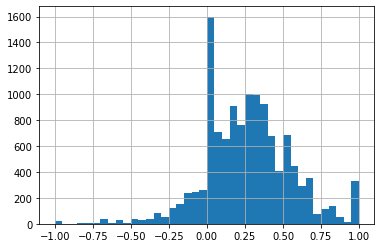

In [35]:
data['polarity'].hist(bins=40)

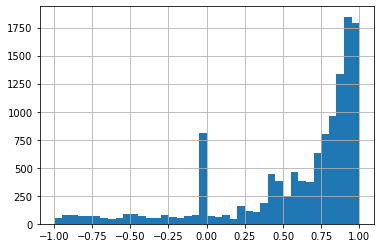

In [37]:
data['compound'].hist(bins=40)